/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_35243/2456987838.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read('/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_reference/neumann/0000.wav')


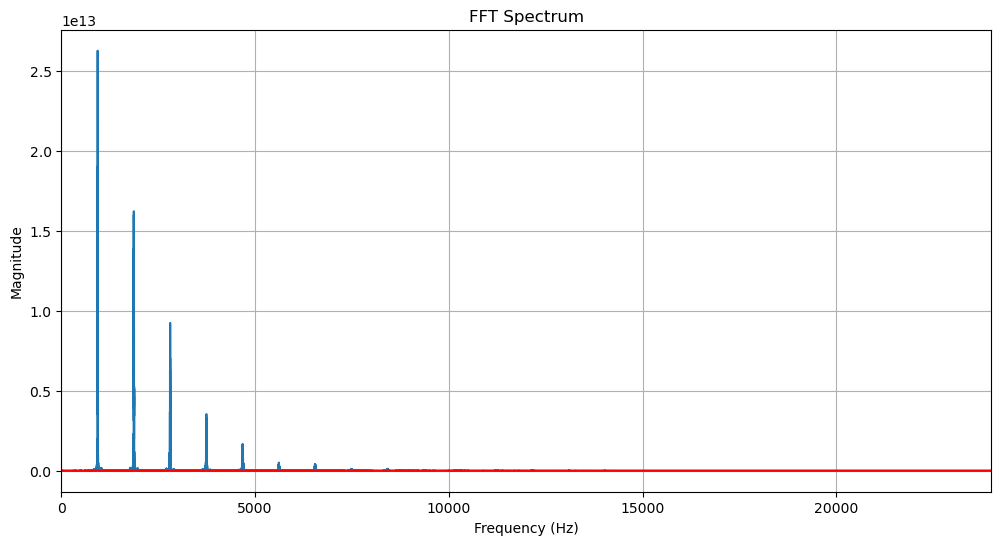

Middle C detected in the audio.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft

# Load the audio file (make sure the file path is correct)
# This assumes the audio file is a WAV file
sampling_rate, data = wavfile.read('/Users/karthikkurella/Downloads/good-sounds/sound_files/trumpet_ramon_reference/neumann/0000.wav')

# If stereo, just take one channel
if len(data.shape) > 1:
    data = data[:, 0]

# Apply FFT to the audio data
fft_spectrum = fft(data)

# Get the magnitude of the FFT
magnitude = np.abs(fft_spectrum)

# Create a frequency array
frequency = np.linspace(0, sampling_rate, len(magnitude))

# Only take the first half of the spectrum (since it is symmetrical and redundant)
half_length = len(frequency)//2
frequency = frequency[:half_length]
magnitude = magnitude[:half_length]

# Find the peak in the magnitude spectrum
# We're interested in a small range around the middle C frequency
middle_c_freq = 261.63
tolerance = 5  # Define a tolerance range of 5 Hz around middle C frequency
middle_c_peak = np.where((frequency > middle_c_freq - tolerance) & (frequency < middle_c_freq + tolerance), magnitude, 0)

# Plot the spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequency, magnitude)  # Plot the full spectrum
plt.plot(frequency, middle_c_peak, color='r')  # Highlight the middle C peak
plt.title('FFT Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sampling_rate/2)  # Limit x-axis to half the sampling rate
plt.grid(True)
plt.show()

# Check if there is a peak at middle C
if np.any(middle_c_peak):
    print("Middle C detected in the audio.")
else:
    print("Middle C not detected in the audio.")


## Perform for all files

In [6]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np
import os

from scipy.io import wavfile

# instruments = ['flute_almudena_stability','violin_raquel_richness','clarinet_pablo_richness','trumpet_ramon_pitch_stability']
instruments = ['cello_margarita_pitch_stability','violin_raquel_pitch_stability','clarinet_pablo_pitch_stability','trumpet_ramon_reference']

# Read audio file
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann"


In [7]:
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np
import os

from scipy.io import wavfile

# instruments = ['flute_almudena_stability','violin_raquel_richness','clarinet_pablo_richness','trumpet_ramon_pitch_stability']
instruments = ['cello_margarita_pitch_stability','violin_raquel_pitch_stability','clarinet_pablo_pitch_stability','trumpet_ramon_reference']

# Read audio file
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/violin_raquel_pitch_stability/neumann"


In [16]:
filelist = []
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"
for i in instruments:
    filetemp = filepath+i+'/'+'neumann'
    counter = 0
    for filename in os.listdir(filetemp):
        if filename.endswith('.wav'):
            filelist.append(filename)
            counter+=1
    print(counter)
len(filelist)

62
72
91
87


312

In [13]:
audio_data = []

import scipy.io
from scipy.signal import butter, filtfilt
from scipy.signal import hann, welch
import numpy as np

v = dict()
Fbe = np.logspace(np.log10(10), np.log10(6000), 120)  # Placeholder using logspace
filepath = "/Users/karthikkurella/Downloads/good-sounds/sound_files/"

from scipy.io import wavfile

import os
for i,file in enumerate(instruments):
    fp = filepath+''+file+'/neumann/'
    arr = [fp + x for x in os.listdir(fp) if x.endswith('.wav')]
    for j,f in enumerate(arr):
        with open(f, 'rb') as wf:
            sampling_rate, data = wavfile.read(wf)
        # If stereo, just take one channel
        if len(data.shape) > 1:
            data = data[:, 0]

        # Apply FFT to the audio data
        fft_spectrum = fft(data)

        # Get the magnitude of the FFT
        magnitude = np.abs(fft_spectrum)

        # Create a frequency array
        frequency = np.linspace(0, sampling_rate, len(magnitude))

        # Only take the first half of the spectrum (since it is symmetrical and redundant)
        half_length = len(frequency)//2
        frequency = frequency[:half_length]
        magnitude = magnitude[:half_length]

        # Find the peak in the magnitude spectrum
        # Adding tolerance
        middle_c_freq = 261.63
        tolerance = 5  # Define a tolerance range of 5 Hz around middle C frequency
        middle_c_peak = np.where((frequency > middle_c_freq - tolerance) & (frequency < middle_c_freq + tolerance), magnitude, 0)

        file_name = file.split('_')[0]
        # Check if there is a peak at middle C
        if np.any(middle_c_peak):
            if file_name in v:
                v[file_name] += 1
            else:
                # Key is not present, add it to the dictionary with a value of 1
                v[file_name] = 1
        else:
            print(f"{fp} does not have middle_C")
print(v)

/var/folders/g8/ryts82jd3c33vl83y_np4dzm0000gn/T/ipykernel_35243/1066898374.py:20: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(wf)


{'cello': 62, 'violin': 72, 'clarinet': 91, 'trumpet': 87}


In [15]:
len(fp)

88